# Домашнее задание по теме «Ансамблирование»

### Преподаватель: 
Олег Булыгин, Даниил Корбут, Наталья Баданина

### Студент: 
Павел Антошкин

### Цель: 
применить на практике базовые ансамблевые методы

### Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

### Этапы работы:
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Подготовьте датасет к обучению моделей.  
a) Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.  
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:  
a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  
a) Повторите п. 5

8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).  
a) Повторите п. 5  

9. Сформулируйте выводы по проделанной работе.  
a) Сравните метрики построенных моделей.  
b) Напишите свое мнение, какая модель наилучшая и почему.  

### Для получения зачета по этому домашнему заданию, 
минимально, должны быть обучены следующие модели: 
- дерево решений, 
- стекинг трех моделей. 
- В данных должны быть обработаны категориальные значения.

### Результат: 
получены знания по использованию базовых ансамблевых методов.

### Форма выполнения:
- ссылка на Jupyter Notebook, загруженный на GitHub
- ссылка на Google Colab
- файл с расширением .ipynb

### Инструменты:
- Jupyter Notebook/Google Colab;
- GitHub.
- данные с сайта
pd.get_dummies, preprocessing.LabelEncoder
модели tree.DecisionTreeClassifier и ensemble.RandomForestClassifier
metrics.classification_report
ensemble.BaggingClassifier
svm.LinearSVC
ensemble.StackingClassifier

### Срок выполнения: 
дедлайн приема решений на проверку

### Рекомендации к выполнению:
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

In [3]:
data = pd.read_csv('heart.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2. Подготовьте датасет к обучению моделей.  
a) Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.  
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [11]:
# Перед преобразованием категориальных данных посмотрим, каково количество уникальных значений для каждой из категорий.

for col in ('Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'):
    print(f'Column {col}:\n{data[col].value_counts()}\n')

Column Sex:
M    725
F    193
Name: Sex, dtype: int64

Column ChestPainType:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Column RestingECG:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Column ExerciseAngina:
N    547
Y    371
Name: ExerciseAngina, dtype: int64

Column ST_Slope:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



In [16]:
# Три колонки преобразуем с помощью cols_to_dummies
cols_to_dummies = ['ChestPainType', 'RestingECG', 'ST_Slope']
data2 = pd.get_dummies(data[cols_to_dummies], columns=cols_to_dummies).copy()
data2.describe()

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Две колонки с бинарными категориями преобразуем с помощью LabelEncoder
from sklearn import preprocessing
le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(data.Sex.unique())
data_Sex_int = le_Sex.transform(data.Sex)
# смотрим первые сто элементов
data_Sex_int[0:100]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [20]:
# Вторая колонка
le_ExerciseAngina = preprocessing.LabelEncoder()
le_ExerciseAngina.fit(data.ExerciseAngina.unique())
data_ExerciseAngina_int = le_ExerciseAngina.transform(data.ExerciseAngina)
# смотрим первые сто элементов
data_ExerciseAngina_int[0:100]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [46]:
# Соберем датасет признаков и выделим серию с целевой переменной
X = pd.concat([data[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']], 
               data2, 
               pd.DataFrame({'Sex2': data_Sex_int}), 
               pd.DataFrame({'ExerciseAngina2': data_ExerciseAngina_int})], axis=1)
y = data['HeartDisease'].copy()
print(f'Целевая колонка (первые 5 строк):\n{Y[0:5]}')
X.head()

Целевая колонка (первые 5 строк):
0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex2,ExerciseAngina2
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,0,0,1,1,0
1,49,160,180,0,156,1.0,0,0,1,0,0,1,0,0,1,0,0,0
2,37,130,283,0,98,0.0,0,1,0,0,0,0,1,0,0,1,1,0
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,0,1,1,0


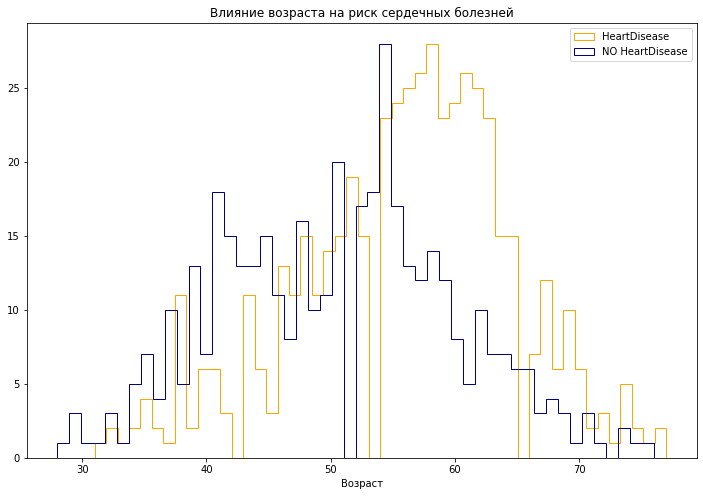

In [38]:
# b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных 
# и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

plt.figure(figsize=(12,8))
plt.hist(data[(data.HeartDisease == 1)].Age, label='HeartDisease', bins=50, color='orange', histtype='step')
plt.hist(data[(data.HeartDisease == 0)].Age, label='NO HeartDisease', bins=50, color='navy', histtype='step')
plt.xlabel('Возраст')
plt.title('Влияние возраста на риск сердечных болезней')
plt.legend()

# Этот график позволяет увидеть, что существует определенное влияние возраста на риск сердечных заболеваний.
# Влияние очевидно: чем старше человек, тем выше риск болезни

<AxesSubplot:title={'center':'Риск сердечных болезней для максимальной частоты сердечных сокращений'}, xlabel='HeartDisease', ylabel='MaxHR'>

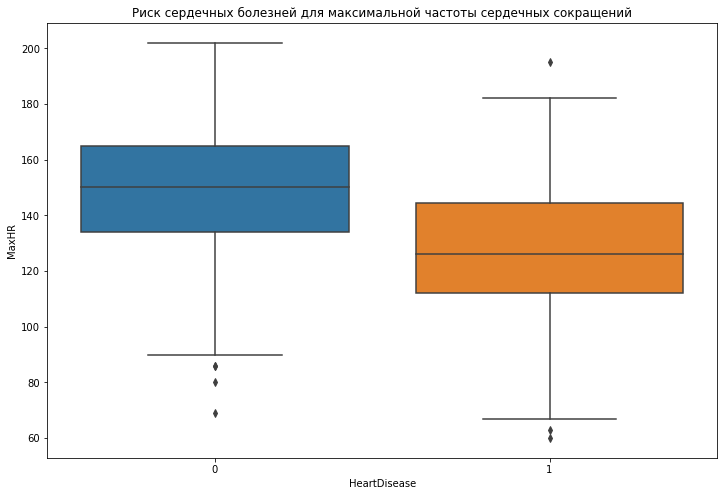

In [45]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Риск сердечных болезней для максимальной частоты сердечных сокращений')
sns.boxplot(y=data['MaxHR'], x=data['HeartDisease'])

# Хорошо известно, что у людей, ведущих спортивный образ жизни, а также у молодых людей максимальная частота
# сердечных сокращений в среднем больше, чем у остальных. И в этом распределении видно, что чем более высокую частоту
# сердечных сокращений можно зафиксировать у человека, тем с меньшей вероятностью он может получить болезнь сердца

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.


In [55]:
# Грузим модуль
from sklearn.model_selection import train_test_split
# Разделяем:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 
# смотрим, как прошло разбиение
print(X.shape)
print(X_train.shape)    

(918, 18)
(734, 18)


### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:  
a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)  
### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [74]:
# Эта функция пригодится дальше
from sklearn.metrics import classification_report

# Создадим функцию, которая будет возвращать точность предсказания по обучающей и тестовой выборкам, 
# а также ссылку на модель

def get_score(X, y, random_seed=21, model=None, print_metrics=False):
    target_names = ['NO Heart Disease', 'Heart Disease']
    if model is None:
        return 0, 0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)  
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    ret_score_train = model.score(X_train, y_train)
    ret_score_test = model.score(X_test, y_test)
    if print_metrics:
        print(f'Точность предсказания по обучающей выборке {ret_score_train}')
        print(f'Точность предсказания по тестовой выборке {ret_score_test}')
        print(f'\nМетрики, полученные с помощью classification_report')
        print(classification_report(y_test, y_predict, target_names=target_names))
    return ret_score_train, ret_score_test, model

In [110]:
# Здесь будем хранить результаты оценки для каждого из использованных методов
all_scores = {}

In [111]:
# Вначале обучаем на DecisionTree
from sklearn.tree import DecisionTreeClassifier
score_train_DT, score_test_DT, model_DT = get_score(X, y, model = DecisionTreeClassifier(), print_metrics = True)
all_scores['DT'] = {'desc': 'DecisionTreeClassifier', 'score': score_test_DT}

Точность предсказания по обучающей выборке 1.0
Точность предсказания по тестовой выборке 0.8152173913043478

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.76      0.80      0.78        76
   Heart Disease       0.86      0.82      0.84       108

        accuracy                           0.82       184
       macro avg       0.81      0.81      0.81       184
    weighted avg       0.82      0.82      0.82       184



In [112]:
from sklearn.ensemble import RandomForestClassifier
score_train_RF, score_test_RF, model_RF = get_score(X, y, model = RandomForestClassifier(), print_metrics = True)
all_scores['RF'] = {'desc': 'RandomForestClassifier', 'score': score_test_RF}

Точность предсказания по обучающей выборке 1.0
Точность предсказания по тестовой выборке 0.8858695652173914

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.89      0.83      0.86        76
   Heart Disease       0.88      0.93      0.90       108

        accuracy                           0.89       184
       macro avg       0.89      0.88      0.88       184
    weighted avg       0.89      0.89      0.89       184



In [ ]:
# Видим, что RandomForest позволил получить более симпатичные цифры предсказаний для тестовой выборки. Запомним это.

### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.


<BarContainer object of 18 artists>

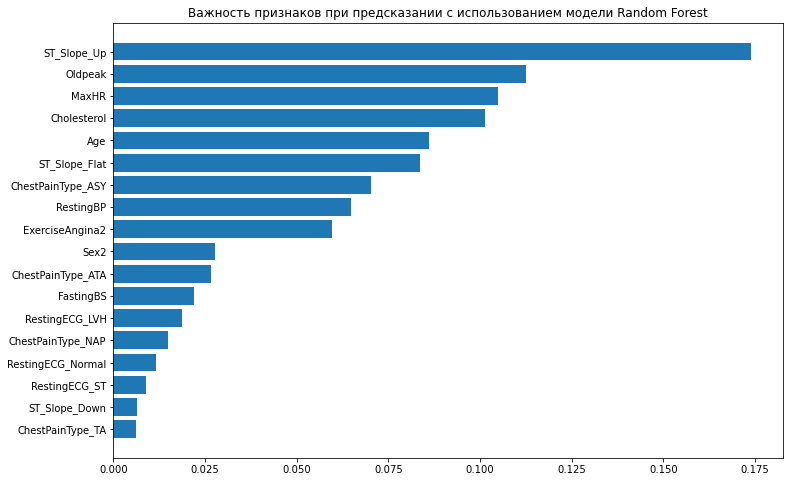

In [88]:
# Собираем датафрейм из колонок и их важности с точки зрения предсказаний для модели model_RF
importances_RF = pd.DataFrame({'col': pd.Series(X.columns), 'importance': model_RF.feature_importances_})

# Сортируем
imp_RF_sorted = importances_RF.sort_values('importance')

# Рисуем
plt.title('Важность признаков при предсказании с использованием модели Random Forest')
plt.barh(imp_RF_sorted.col, imp_RF_sorted.importance)

### 7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  
a) Повторите п. 5


In [113]:
# в п.4а необходимо было использовать модель tree.DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Можно посмотреть, как влияет на точность предсказания количество "оценщиков" при запуске модели (n_estimators)
print('N_ESTIMATORS = 10')
BC10 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=21)
score_train_BC10, score_test_BC10, model_BC10F = get_score(X, y, model = BC10, print_metrics = True)
all_scores['BC10'] = {'desc': 'DecisionTreeClassifier, n_estimators=10', 'score': score_test_BC10}

print('N_ESTIMATORS = 20')
BC20 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, random_state=21)
score_train_BC20, score_test_BC20, model_BC20 = get_score(X, y, model = BC20, print_metrics = True)
all_scores['BC20'] = {'desc': 'DecisionTreeClassifier, n_estimators=20', 'score': score_test_BC20}

print('N_ESTIMATORS = 30')
BC30 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30, random_state=21)
score_train_BC30, score_test_BC30, model_BC30 = get_score(X, y, model = BC30, print_metrics = True)
all_scores['BC30'] = {'desc': 'DecisionTreeClassifier, n_estimators=30', 'score': score_test_BC30}

# Видим, что чем больше запусков модели (в данном случае - DecisionTreeClassifier) используется в бэггинге, тем точнее результат

N_ESTIMATORS = 10
Точность предсказания по обучающей выборке 0.9904632152588556
Точность предсказания по тестовой выборке 0.8532608695652174

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.80      0.87      0.83        76
   Heart Disease       0.90      0.84      0.87       108

        accuracy                           0.85       184
       macro avg       0.85      0.86      0.85       184
    weighted avg       0.86      0.85      0.85       184

N_ESTIMATORS = 20
Точность предсказания по обучающей выборке 0.9959128065395095
Точность предсказания по тестовой выборке 0.8532608695652174

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.82      0.83      0.82        76
   Heart Disease       0.88      0.87      0.87       108

        accuracy                           0.85       184
       macro avg       0.85

### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).  
a) Повторите п. 5  


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
estimators = [
    ('dt', DecisionTreeClassifier(random_state=21)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=21)),
    ('svc', SVC(random_state=21))
]

# А здесь можно попробовать использовать разные модели для финальной оценки после оценок по каждой из моделей, 
# указанных в estimators, и сравнить эффективность final_estimator
print('FINAL_ESTIMATOR = LogisticRegression')
model_SC_LR = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
score_train_SC_LR, score_test_SC_LR, model_SC_LR = get_score(X, y, model = model_SC_LR, print_metrics = True)
all_scores['SC_LR'] = {'desc': 'StackingClassifier with LogisticRegression, n_estimators=10', 'score': score_test_SC_LR}

print('FINAL_ESTIMATOR = DecisionTreeClassifier')
model_SC_DT = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
score_train_SC_DT, score_test_SC_DT, model_SC_DT = get_score(X, y, model = model_SC_DT, print_metrics = True)
all_scores['SC_DT'] = {'desc': 'StackingClassifier with DecisionTreeClassifier, n_estimators=10', 'score': score_test_SC_DT}

print('FINAL_ESTIMATOR = RandomForestClassifier')
model_SC_RF = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
score_train_SC_RF, score_test_SC_RF, model_SC_RF = get_score(X, y, model = model_SC_RF, print_metrics = True)
all_scores['SC_RF'] = {'desc': 'StackingClassifier with RandomForestClassifier, n_estimators=10', 'score': score_test_SC_RF}

FINAL_ESTIMATOR = LogisticRegression
Точность предсказания по обучающей выборке 0.989100817438692
Точность предсказания по тестовой выборке 0.8586956521739131

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.86      0.79      0.82        76
   Heart Disease       0.86      0.91      0.88       108

        accuracy                           0.86       184
       macro avg       0.86      0.85      0.85       184
    weighted avg       0.86      0.86      0.86       184

FINAL_ESTIMATOR = DecisionTreeClassifier
Точность предсказания по обучающей выборке 0.9100817438692098
Точность предсказания по тестовой выборке 0.7989130434782609

Метрики, полученные с помощью classification_report
                  precision    recall  f1-score   support

NO Heart Disease       0.74      0.79      0.76        76
   Heart Disease       0.84      0.81      0.82       108

        accuracy                           0

### 9. Сформулируйте выводы по проделанной работе.  
a) Сравните метрики построенных моделей.  
b) Напишите свое мнение, какая модель наилучшая и почему.  

In [119]:
for scr_code, scr in all_scores.items():
    print(f"Точность {round(scr['score'], 4)}, модель {scr['desc']}")

Точность 0.8152, модель DecisionTreeClassifier
Точность 0.8859, модель RandomForestClassifier
Точность 0.8533, модель DecisionTreeClassifier, n_estimators=10
Точность 0.8533, модель DecisionTreeClassifier, n_estimators=20
Точность 0.8641, модель DecisionTreeClassifier, n_estimators=30
Точность 0.8587, модель StackingClassifier with LogisticRegression, n_estimators=10
Точность 0.7989, модель StackingClassifier with DecisionTreeClassifier, n_estimators=10
Точность 0.8261, модель StackingClassifier with RandomForestClassifier, n_estimators=10


При сравнении результатов предсказания по единственному параметру (точности, она же - коэффициент детерминации) получаем, что лучший результат был при использовании модели RandomForestClassifier.
Вторым по эффективности оказалось использование бэггинга с n_estimators = 30,
Третьим - стекинг с использованием для обучения на "втором этапе" логистической регрессии.

Тем не менее многое зависит тут от конкретных задач анализа, ибо могут оказаться не менее существенными и другие метрики точности оценок моделей, в частности - precision, recall и т.п.
Так, к примеру, при использовании бєггинга с n_estimators = 10 параметр precision при предсказании людей с больным сердцем оказался наилучшим среди всех рассмотренных моделей. В общем, многое зависит от контекста.

Кажется не вполне разумным кажется увлекаться увеличением значения параметра n_estimators, поскольку это влияет и на скорость вычислений, и на нагрузку на оборудование (для больших датасетов естественно).

Почему в данном случае лучшим оказался RandomForestClassificator? Видимо, такова была специфика данных, немалое количество параметров модели оказались достаточно значимыми, важными для предсказания (недаром мы именно для RandomForest "нарисовали" соответствующую гистограмму).

